In [1]:
from complexity.airspace_2 import airspace
from traffic.data import nm_airspaces

In [2]:
# define airspace
lsaguac = airspace(
    id="LSAGUAC",
    airspace = nm_airspaces['LSAGUAC']
)

# fetch data
lsaguac.get_data(
    start_date="2019-01-01",
    end_date="2020-01-01",
)

# preprocess data
lsaguac.preprocess_data()

# visualise data
# fig = lsaguac.plot(traj_sample=True)
# fig.show()

Fetching data...
Combining data...


  0%|          | 0/12 [00:00<?, ?it/s]

Preprocessing data in monthly chuks...


  0%|          | 0/12 [00:00<?, ?it/s]

Combining preprocessed data...
Reducing to TMA extent...


In [3]:
hourly_df = lsaguac.get_hourly_df()

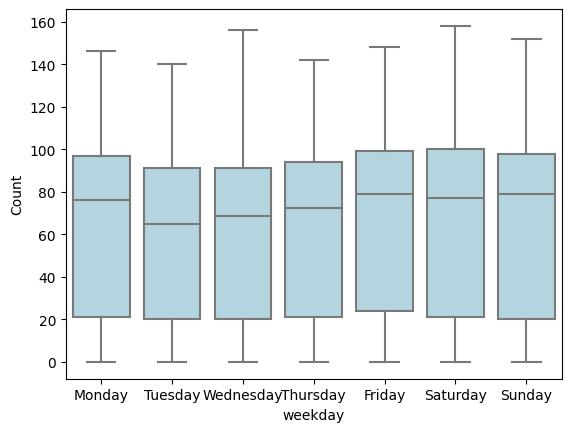

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the order of the weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# order=weekday_order
# Create the boxplot with the desired order
# ax = sns.boxplot(x="weekday", y="ac_count", data=hourly_df, showfliers=True, color='lightblue')
ax = sns.boxplot(x="weekday", y="ac_count", data=hourly_df, order=weekday_order, showfliers=True, color='lightblue')

# Add the horizontal lines for median and 40th percentile
# ax.axhline(median_count, ls='--', color='red')
# ax.axhline(percentile_40, ls='--', color='green')

# Set the y-label
ax.set_ylabel('Count')

# Show the plot
plt.show()

In [13]:
ax = sns.boxplot(x="hour", y="ac_count", data=hourly_df, showfliers=True, color='lightblue')
# add horizontal line for median
# ax.axhline(median_count, ls='--', color='red')
# ax.axhline(percentile_40, ls='--', color='green')
# change x-axis labels to start with 1

In [6]:
# make a plotly density plot of the stay time
import plotly.express as px
fig = px.density_heatmap(hourly_df, x="day_of_year", y="hour_of_day", z="ac_count", histfunc="avg", nbinsx=365, nbinsy=24, color_continuous_scale="jet")
# update x and y axis labels
fig.update_xaxes(title_text='Day of the year')
fig.update_yaxes(title_text='Hour of the day')
fig.update_layout(title_text='Hourly observed aircraft')
fig.update_layout(coloraxis_colorbar=dict(title="Count"))
fig.show()